## Library imports

* pandas: Pandas is een open source library met BSD-licentie die krachtige, eenvoudig te gebruiken datastructuren en gegevens analyse tools voor de programmeertaal Python aanbiedt.
* numpy: Numpy is een core library voor wetenschappelijke berekeningen en biedt een krachtig multidimensionale array-object en tools om met de array-object te werken.
* sklearn: Een simpel en effectief tool voor data mining en analyses. Wordt gebruikt voor het aanleveren van de dataset voor de demo om machine learning mogelijk te maken. 
* matplotlib: voor het creëeren van de plots.
* seaborn: Seaborn is een Python-visualisatiebibliotheek op basis van matplotlib. Het biedt een interface op hoog niveau voor het tekenen van aantrekkelijke statistische afbeeldingen. De seaborn library bouwt zich op matplotlib.
* LogisticRegression: dit is een algorithme model die je gebruik van sklearn.linear_model. 
* Train_test_split: Splitsen van arrays of matrixen in willekeurige trainsets en testsubsets.
* statsmodels.api: statsmodels is een Python-module die klassen en functies biedt voor de schatting van veel verschillende statistische modellen, maar ook voor het uitvoeren van statistische tests en het verkennen van statistische gegevens. Voor elke schatter is een uitgebreide lijst met resultaatstatistieken beschikbaar. De resultaten worden getoetst aan bestaande statistische pakketten om er zeker van te zijn dat ze correct zijn. 
* scipy.stats: Deze module bevat een groot aantal kansverdeling functies en is een groeiende library met statistische functies.


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

c:\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Data import

De onderstaande code importeert de dataset van banking.csv file voor de demo. Hierbij wordt ook de data geshaped en getoond. De gegevens hebben betrekking op direct marketing-campagnes (telefoontjes) van een Portugese bankinstelling. Het doel van de classificatie is om te voorspellen of de klant een termijndeposito (variabele y) zal overschrijven (1/0). 

Deze dataset biedt de klantinformatie. Het bevat 41188 records en 21 velden.


In [2]:
data = pd.read_csv('./banking.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


### Head functie

De head functie retourneert de 5 top rows van de DataFrame. Het is mogelijk om in de parameter aantal rows te defineren 


In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### Input variabelen

Input variables (zie [bank-names.txt](https://github.com/HanNotSMachineLearning/LogisticRegressionDemo/blob/master/bank-names.txt))

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric)

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

### Voorspel variabele (gewenst doelwit):
y - heeft de klant zich ingeschreven voor een termijndeposito? (binair: '1', '0')

### Categoriseren/Grouperen 
De onderwijskolom van de dataset heeft vele categorieën en we moeten de categorieën reduceren voor een betere modellering. De onderwijskolom heeft de volgende categorieën: basic.4y, unknown, university.degree, high.school,
                       basic.9y, professional.course, basic.6y, illiterate

### Unique functie
Met de uniqe functie wordt ervoor gezorgd dat de education categorie van de data wordt gecategoriseerd en dat deze unique zijn. Hierbij wordt een array object gemaakt.


In [4]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

### Reduceren

Om te reduceren worden de onderstaande basic.9y, basic.6y, basic.4y in 1 categorie gegroupeerd. De nieuwe groep is Basic. Daarna wordt opnieuw de unique functie uitgevoerd om een unieke array object voor de categorie gecreëerd. 


In [5]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [6]:
data['education'].unique()


array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

# Data exploratie

Bij data exploratie is het de bedoeling dat je de beste voorspeller variabelen kiest om de voorspelling (gewenste doelwit wat je wilt voorspellen - variabel y) zo goed mogelijk te kunnen doen. Hierbij worden er verschil gemaakt tussen numeric en categorical variabelen. Je kijkt bij de data exploratie naar statistieken van verschillende variabelen.

### Value_counts functie
Retourneert een object met tellingen van unieke waarden. De kolom y van de dataframe wordt opgeteld per unique value. Dus 1 of 0 worden opgeteld. 

In [7]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

### sns.countplot en plt.savefig
De sns.countplot functie maakt een plot (grafiek) gebasseerd op data van banking.csv. x is de kolom van de data die gebruikt wordt. Palette zijn kleuren die gebruikt zullen worden.  

De savefig('count_plot') functie slaat de grafiek op in een png bestand met de naam count_plot.

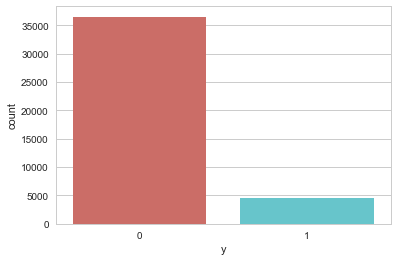

<Figure size 432x288 with 0 Axes>

In [8]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

Er zijn 36548 nee's en 4640 ja's zoals in de tabel te zien voor de doelwit voorspel variabel y.

De Onderstaande code data.groupby('y').mean() geeft een gemiddelde voor alle nummeric kolommen weer. 

### Mean Functie

De mean functie geeft een gemiddelde voor float, numeric en int kolommen/variabelen

In [9]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


## Observatie
De gemiddelde leeftijd van klanten die de termijndeposito hebben gekocht, is hoger dan die van klanten die dat niet deden.

De pdays (dagen nadat de klant voor het laatst werd gecontacteerd) ligt begrijpelijk lager voor de klanten die het hebben gekocht. Hoe lager de pdays, hoe beter de herinnering aan de laatste oproep en dus hoe groter de kans op een uitverkoop.

Verrassend genoeg zijn campaign (aantal contacten of oproepen tijdens de huidige campagne) lager voor klanten die de termijndeposito hebben gekocht.

We kunnen categorische gemiddelden berekenen voor andere categorische variabelen zoals education en merital om een gedetailleerder beeld van onze gegevens te krijgen.

### Observatie van job categorie

Hieronder wordt alle gemiddelden van alle numeric kolommen bekeken tegenover de job categorie.

In [10]:
data.groupby('job').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


### Observatie van merital categorie

Hieronder wordt alle gemiddelden van alle numeric kolommen bekeken tegenover de merital categorie.

In [11]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


### Observatie van education categorie

Hieronder wordt alle gemiddelden van alle numeric kolommen bekeken tegenover de education categorie.

In [12]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


## Visualisatie

De visualitatie van de demo is lastig te begrijpen en het is lastig om te  concluderen of een variabel, een goede voorspeller kan zijn voor de uitkomstvariabel y. De demo maker geeft geen onderbouwing waarom de categorie variabel gebruikt kan worden als een goede voorspeller. Hij maakt zelf een aanname met de statistieken die hij ziet. Het doel van de visualitatie is dat de data van een categorie variabel moet worden geanalyseerd. 

De demo maker lijkt te verwachten dat de personen die de demo uitvoeren verstand heeft van data analyses en data mining. 

### Visualisatie van job categorieën tegenover y numeric variabel


De frequency of purchase (frequentie van aankoop) van de (termijndeposito - variabel y) aanbetaling is sterk afhankelijk van de Job (functie). De Job variabel kan dus een goede voorspeller van de uitkomstvariabele zijn.

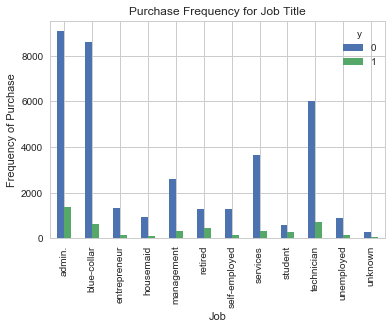

In [13]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

### Visualisatie van Merital categorieen tegenover y numeric variabel


Moeilijk te zien, maar de Mertial variabel(burgerlijke staat) lijkt geen sterke voorspeller te zijn voor de uitkomstvariabele y.

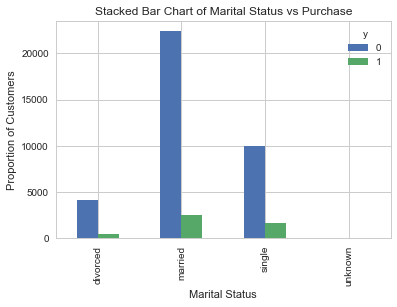

In [14]:
table=pd.crosstab(data.marital,data.y).plot(kind='bar')
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

### Visualisatie van Education categorieën tegenover y numeric variabel


Education variabel(Onderwijs) lijkt een goede voorspeller van de uitkomstvariabele y.

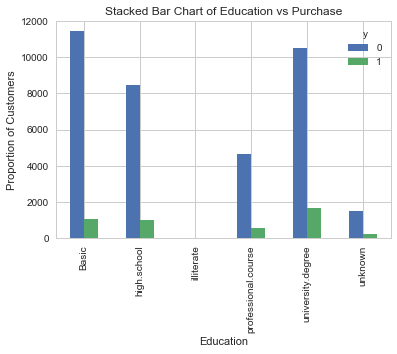

In [15]:
table=pd.crosstab(data.education,data.y).plot(kind='bar')
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

### Visualisatie van day_of_week categorieën tegenover y numeric variabel


De dag van de week is mogelijk geen goede voorspeller van de uitkomstvariabele y.

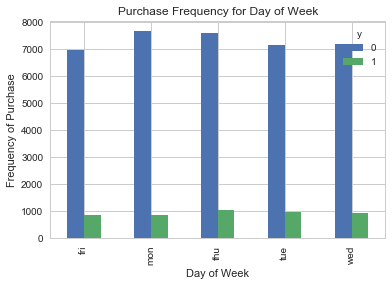

In [16]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

### Visualisatie van month categorieën tegenover y numeric variabel

Month(Maand) kan een goede voorspeller van de uitkomstvariabele y zijn

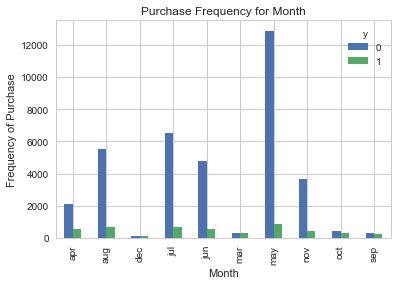

In [17]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

### Visualisatie van age categorieen tegenover y numeric variabel

De meeste klanten van de bank in deze dataset bevinden zich in het leeftijdscategorie 30-40.

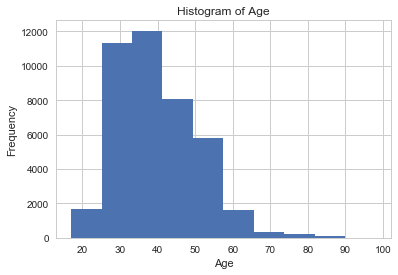

In [18]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

### Visualisatie van poutcome categorieën tegenover y numeric variabel


Poutcome lijkt een goede voorspeller van de uitkomstvariabele y te zijn.

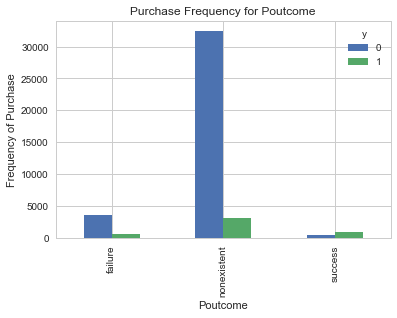

In [19]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

## Create dummy variables

Bij een dummy variabel wordt er gezorgd dat elke categoral variabelen worden gemapt. De categorieën van een categorical variabel worden uitgespreid zoals in de dummy data print. 

Een job variabel heeft bijvoorbeeld de categorieën: admin, blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown. Elk van deze categorie krijgt een 1 zodra ze waar zijn. 

Voorbeeld: 
De eerste rij van de origin data staat dat job blue-collar is. 

Bij de dummy data wordt de job per categorie gemapt. In dit geval wordt de job variabel categorie blue-collar met 1 aangevinkt. Alle andere waarden worden met 0 aangevinkt. 

resultaat:
De bedoeling van een dummy data is dat de categorical variabelen worden gemapt en een 1 krijgen zodra de conditie(zie voorbeeld) waar is. Nadat alle gategorical variabelen zijn gemakt, dan wordt de categorical variabel vervangen door de dummy variabelen. De categorical variabel wordt dan niet meegenomen, zie to_keep print. 

### pd.get_dummy functie

De get dummy funtie kijkt naar alle categorical variabelen. Alle categorical variabelen worden dan gespreid en een 1 wordt ingevoerd zodra de conditie klopt. Zie uitleg in Hoofdstuk Create dummy variables.  

### data.join

Met deze functie worden de originele data en de dummy data samengevoegd. Resultaat is te zien in de data1 print. 

In [20]:
print("origin banking data")
print(data)

origin banking data
       age            job   marital            education  default  housing  \
0       44    blue-collar   married                Basic  unknown      yes   
1       53     technician   married              unknown       no       no   
2       28     management    single    university.degree       no      yes   
3       39       services   married          high.school       no       no   
4       55        retired   married                Basic       no      yes   
5       30     management  divorced                Basic       no      yes   
6       37    blue-collar   married                Basic       no      yes   
7       39    blue-collar  divorced                Basic       no      yes   
8       36         admin.   married    university.degree       no       no   
9       27    blue-collar    single                Basic       no      yes   
10      34      housemaid    single    university.degree       no       no   
11      41     management   married    unive

In [21]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    print("dummy data")
    print(cat_list)
    data1=data.join(cat_list)
    data=data1

dummy data
       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0               0                1                 0              0   
1               0                0                 0              0   
2               0                0                 0              0   
3               0                0                 0              0   
4               0                0                 0              0   
5               0                0                 0              0   
6               0                1                 0              0   
7               0                1                 0              0   
8               1                0                 0              0   
9               0                1                 0              0   
10              0                0                 0              1   
11              0                0                 0              0   
12              0                0                 0              

dummy data
       contact_cellular  contact_telephone
0                     1                  0
1                     1                  0
2                     1                  0
3                     1                  0
4                     1                  0
5                     1                  0
6                     1                  0
7                     1                  0
8                     1                  0
9                     1                  0
10                    0                  1
11                    1                  0
12                    1                  0
13                    1                  0
14                    0                  1
15                    1                  0
16                    1                  0
17                    0                  1
18                    0                  1
19                    1                  0
20                    0                  1
21                    0                  1


dummy data
       poutcome_failure  poutcome_nonexistent  poutcome_success
0                     0                     1                 0
1                     0                     1                 0
2                     0                     0                 1
3                     0                     1                 0
4                     0                     0                 1
5                     0                     1                 0
6                     0                     1                 0
7                     0                     1                 0
8                     0                     0                 1
9                     1                     0                 0
10                    0                     1                 0
11                    0                     1                 0
12                    0                     1                 0
13                    0                     1                 0
14                    0      

In [22]:
print("data1")
print(data1)

data1
       age            job   marital            education  default  housing  \
0       44    blue-collar   married                Basic  unknown      yes   
1       53     technician   married              unknown       no       no   
2       28     management    single    university.degree       no      yes   
3       39       services   married          high.school       no       no   
4       55        retired   married                Basic       no      yes   
5       30     management  divorced                Basic       no      yes   
6       37    blue-collar   married                Basic       no      yes   
7       39    blue-collar  divorced                Basic       no      yes   
8       36         admin.   married    university.degree       no       no   
9       27    blue-collar    single                Basic       no      yes   
10      34      housemaid    single    university.degree       no       no   
11      41     management   married    university.degree  

In [23]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
print("to_keep")
print(to_keep)

to_keep
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',

In [24]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [25]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

## Feature Selection

RFE: 
Functie ranking met recursieve feature-eliminatie.

Het is een schatter die gewichten toewijst aan features (bijvoorbeeld de coëfficiënten van een lineair model). Het doel van een recursieve feature-eliminatie (RFE) is het selecteren van features door recursief rekening te houden met kleinere en kleinere sets van feature. Hoe belangrijker ze zijn hoe lager het getal wordt (gewicht 1 betekent dat het feature goed gerbuikt kan worden). 

Cols is het resultaat van de feature eliminatie. De cols array bevat de features waarbij het gewicht 1 is.

### Functie RFE(logreg, 18)

De functie neemt de LogisticRegression algorithme en daarbij wordt er een aantal geselecteerde feature aangegeven. 

### Fit functie

Met de fit functie wordt de data getraind om zo een feature selectie te verkrijgen die het meest samenhang hebben om te gerbuiken voor logistic regression machine learning algoritme. 

Hierbij wordt de data_final[x] gebruikt om te kijken of ze een goede samenhang hebben met de uitkomst variabel y. 



In [26]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y].values.ravel())
print("support")
print(rfe.support_)
print("ranking")
print(rfe.ranking_)
print("============= data_final[X] ===================")
data_final[X].columns.values

support
[False False False False  True False False False  True False False  True
 False False False  True False False  True False False False False False
 False False  True False False False False False  True False False False
 False False False False False  True False  True  True  True False False
  True  True  True False False False  True False False False  True  True
  True]
ranking
[35 33 14 40  1 17 21 23  1 30 13  1 24 39 42  1 31  6  1 25 26 41  8  9
 10 43  1  2 38  3  4  5  1 20 44 36 15 37 22 19 16  1 18  1  1  1 28 27
  1  1  1 32 12 11  1 34 29  7  1  1  1]
============= data_final[X] ===================


array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
    

### RFE uitkomst 
De Recursive Feature-Elimination (RFE) heeft ons geholpen de volgende features te selecteren: "vorige", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", " month_dec "," month_jul "," month_nov "," month_oct "," month_sep "," day_of_week_fri "," day_of_week_wed "," poutcome_failure "," poutcome_nonexistent "," poutcome_success ".

In [27]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=data_final[cols]
print(X)
y=data_final['y']

       previous  euribor3m  job_blue-collar  job_retired  job_services  \
0             0      4.963                1            0             0   
1             0      4.021                0            0             0   
2             2      0.729                0            0             0   
3             0      1.405                0            0             1   
4             1      0.869                0            1             0   
5             0      4.961                0            0             0   
6             0      1.327                1            0             0   
7             0      1.313                1            0             0   
8             1      1.266                0            0             0   
9             1      1.410                1            0             0   
10            0      4.864                0            0             0   
11            0      4.964                0            0             0   
12            0      4.965            

## Implementing the model
Met implementing the model wordt er een statistiek weergegeven waarbij je de p-values kan zien. De p-values is belangrijk en geeft aan dat de variabele die laag zijn (liefst onder 0.05), de belangrijkste factor zijn voor het uitendelijke resultaat bij het voorspellen van de y variabelen. 

In [28]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.287116
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41170
Method:                           MLE   Df Model:                           17
Date:                Tue, 22 May 2018   Pseudo R-squ.:                  0.1844
Time:                        09:46:41   Log-Likelihood:                -11826.
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                 0.2385      0.051      4.642      0.000       0.138       0.339

De p-waarden voor de meeste variabelen zijn erg klein, dit betekent dat de waarde van deze variabele een belangrijke factor is voor het uiteindelijke resultaat, daarom zijn de meeste van deze variabelen significant voor het model.

## Logistic Regression Model Fitting
Eenmaal als er een model is, dan moet de model aan de hand van de data worden bijgesteld. Hierbij stel je de parameters bij  om het meest accurate voorspelling te kunnen doen. Dit doe je aan de hand van de data. 

### train_test_split functie

Splitsen van arrays of matrics in willekeurige trainsets en testsets. Hieronder wordt 30% data gebruikt voor testen en 70% voor het trainen.

vervolgens wordt de train data getraind. 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predicting the test set results and caculating the accuracy

Nu het model is bijgesteld, dan kan er een predictie worden gemaakt. Hierbij wordt de test feature data gebruikt om de voorspel variable y te voorspellen. Hieruit komt er een accuracy waarde uit.  

In [30]:
y_pred = logreg.predict(X_test)

In [31]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


## Cross validation

Cross validation houdt in dat je je data separeert in k (het aantal subset dat je wilt). De gesepareerde resultaat van de data wordt hierdoor nog accurater. De bedoeling van cross-validation is om te zorgen de resultaat van de model zo accuraat mogelijk is. 

In [32]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.897


## Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10872   109]
 [ 1122   254]]


### Accuracy

In [34]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95     10981
          1       0.70      0.18      0.29      1376

avg / total       0.88      0.90      0.87     12357



### Interpretation

## ROC Curvefrom sklearn import metrics

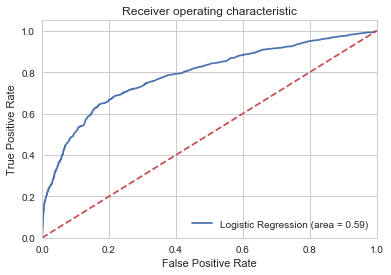

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()